# J2118 SED analysis

In [17]:
import os, time, pdb
import numpy as np

#### Plotting preferences

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.8, palette='Set2')
%matplotlib inline

In [27]:
from prospect.models.templates import TemplateLibrary
TemplateLibrary.describe('nebular')

Free Parameters: (name: prior) 
-----------
  

Fixed Parameters: (name: value [, depends_on]) 
-----------
  add_neb_emission: True 
  add_neb_continuum: True 
  nebemlineinspec: True 
  gas_logz: 0.0 <function stellar_logzsol at 0x11929c598>
  gas_logu: -2.0 


In [19]:
from prospect.io import read_results as reader

In [20]:
result, obs, _ = reader.results_from('j2118-delayed-tau.h5', dangerous=False)
print(result.keys())

dict_keys(['model_params', 'optimizer_duration', 'paramfile_text', 'prospector_version', 'run_params', 'chain', 'efficiency', 'information', 'lnlikelihood', 'lnprobability', 'logvol', 'logz', 'logzerr', 'niter', 'samples_id', 'weights', 'ncall', 'sampling_duration', 'theta_labels', 'obs', 'model', 'optimization_results'])


In [7]:
from hizea.prospector import load_model, load_sps
model = load_model()
%time sps = load_sps()

In [21]:
imax = np.argmax(result['lnprobability'])
theta_max = result["chain"][imax, :]
print('MAP value: {}'.format(theta_max))

MAP value: [1.23525584e+11 2.98582420e-01 9.85284363e-01 1.01303614e+00
 8.59463628e+00]


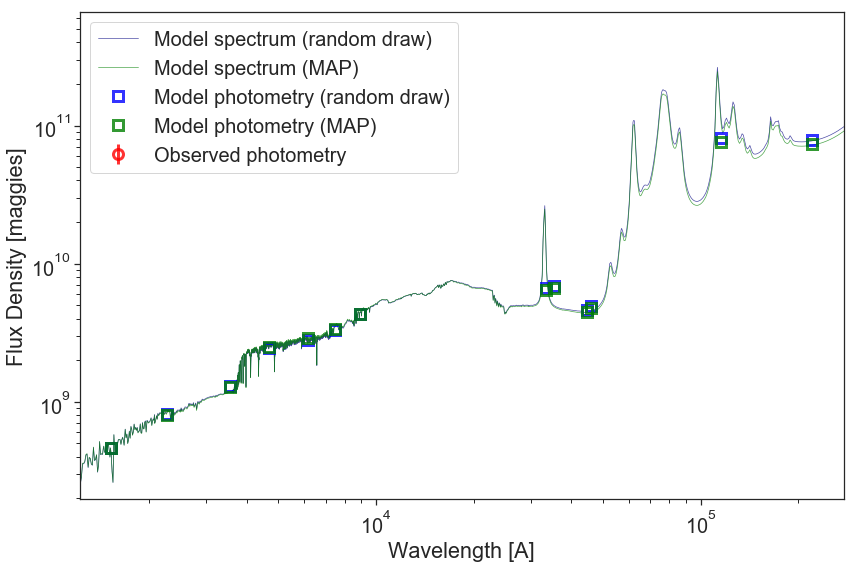

In [22]:
# randomly chosen parameters from chain
randint = np.random.randint
theta = result["chain"][randint(len(result["chain"]))]

# generate models
#sps = reader.get_sps(result)  # this works if using parameter files
mspec, mphot, mextra = model.mean_model(theta, obs, sps=sps)
mspec_map, mphot_map, _ = model.mean_model(theta_max, obs, sps=sps)

wspec = sps.wavelengths * (1.0 + model.params.get('zred'))
wphot = obs["phot_wave"]

xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
temp = np.interp(np.linspace(xmin,xmax,10000), wspec, mspec)
ymin, ymax = temp.min()*0.8, temp.max()/0.4

# Make plot of data and model
fig, ax = plt.subplots(figsize=(12, 8))

ax.loglog(wspec, mspec, label='Model spectrum (random draw)',
       lw=0.7, color='navy', alpha=0.7)
ax.loglog(wspec, mspec_map, label='Model spectrum (MAP)',
       lw=0.7, color='green', alpha=0.7)
ax.errorbar(wphot, mphot, label='Model photometry (random draw)',
         marker='s', markersize=10, alpha=0.8, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='blue', 
         markeredgewidth=3)
ax.errorbar(wphot, mphot_map, label='Model photometry (MAP)',
         marker='s', markersize=10, alpha=0.8, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='green', 
         markeredgewidth=3)
ax.errorbar(wphot, obs['maggies'], yerr=obs['maggies_unc'], 
         label='Observed photometry', ecolor='red', 
         marker='o', markersize=10, ls='', lw=3, alpha=0.8, 
         markerfacecolor='none', markeredgecolor='red', 
         markeredgewidth=3)

ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Flux Density [maggies]')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.legend(loc='best', fontsize=20)
plt.tight_layout()

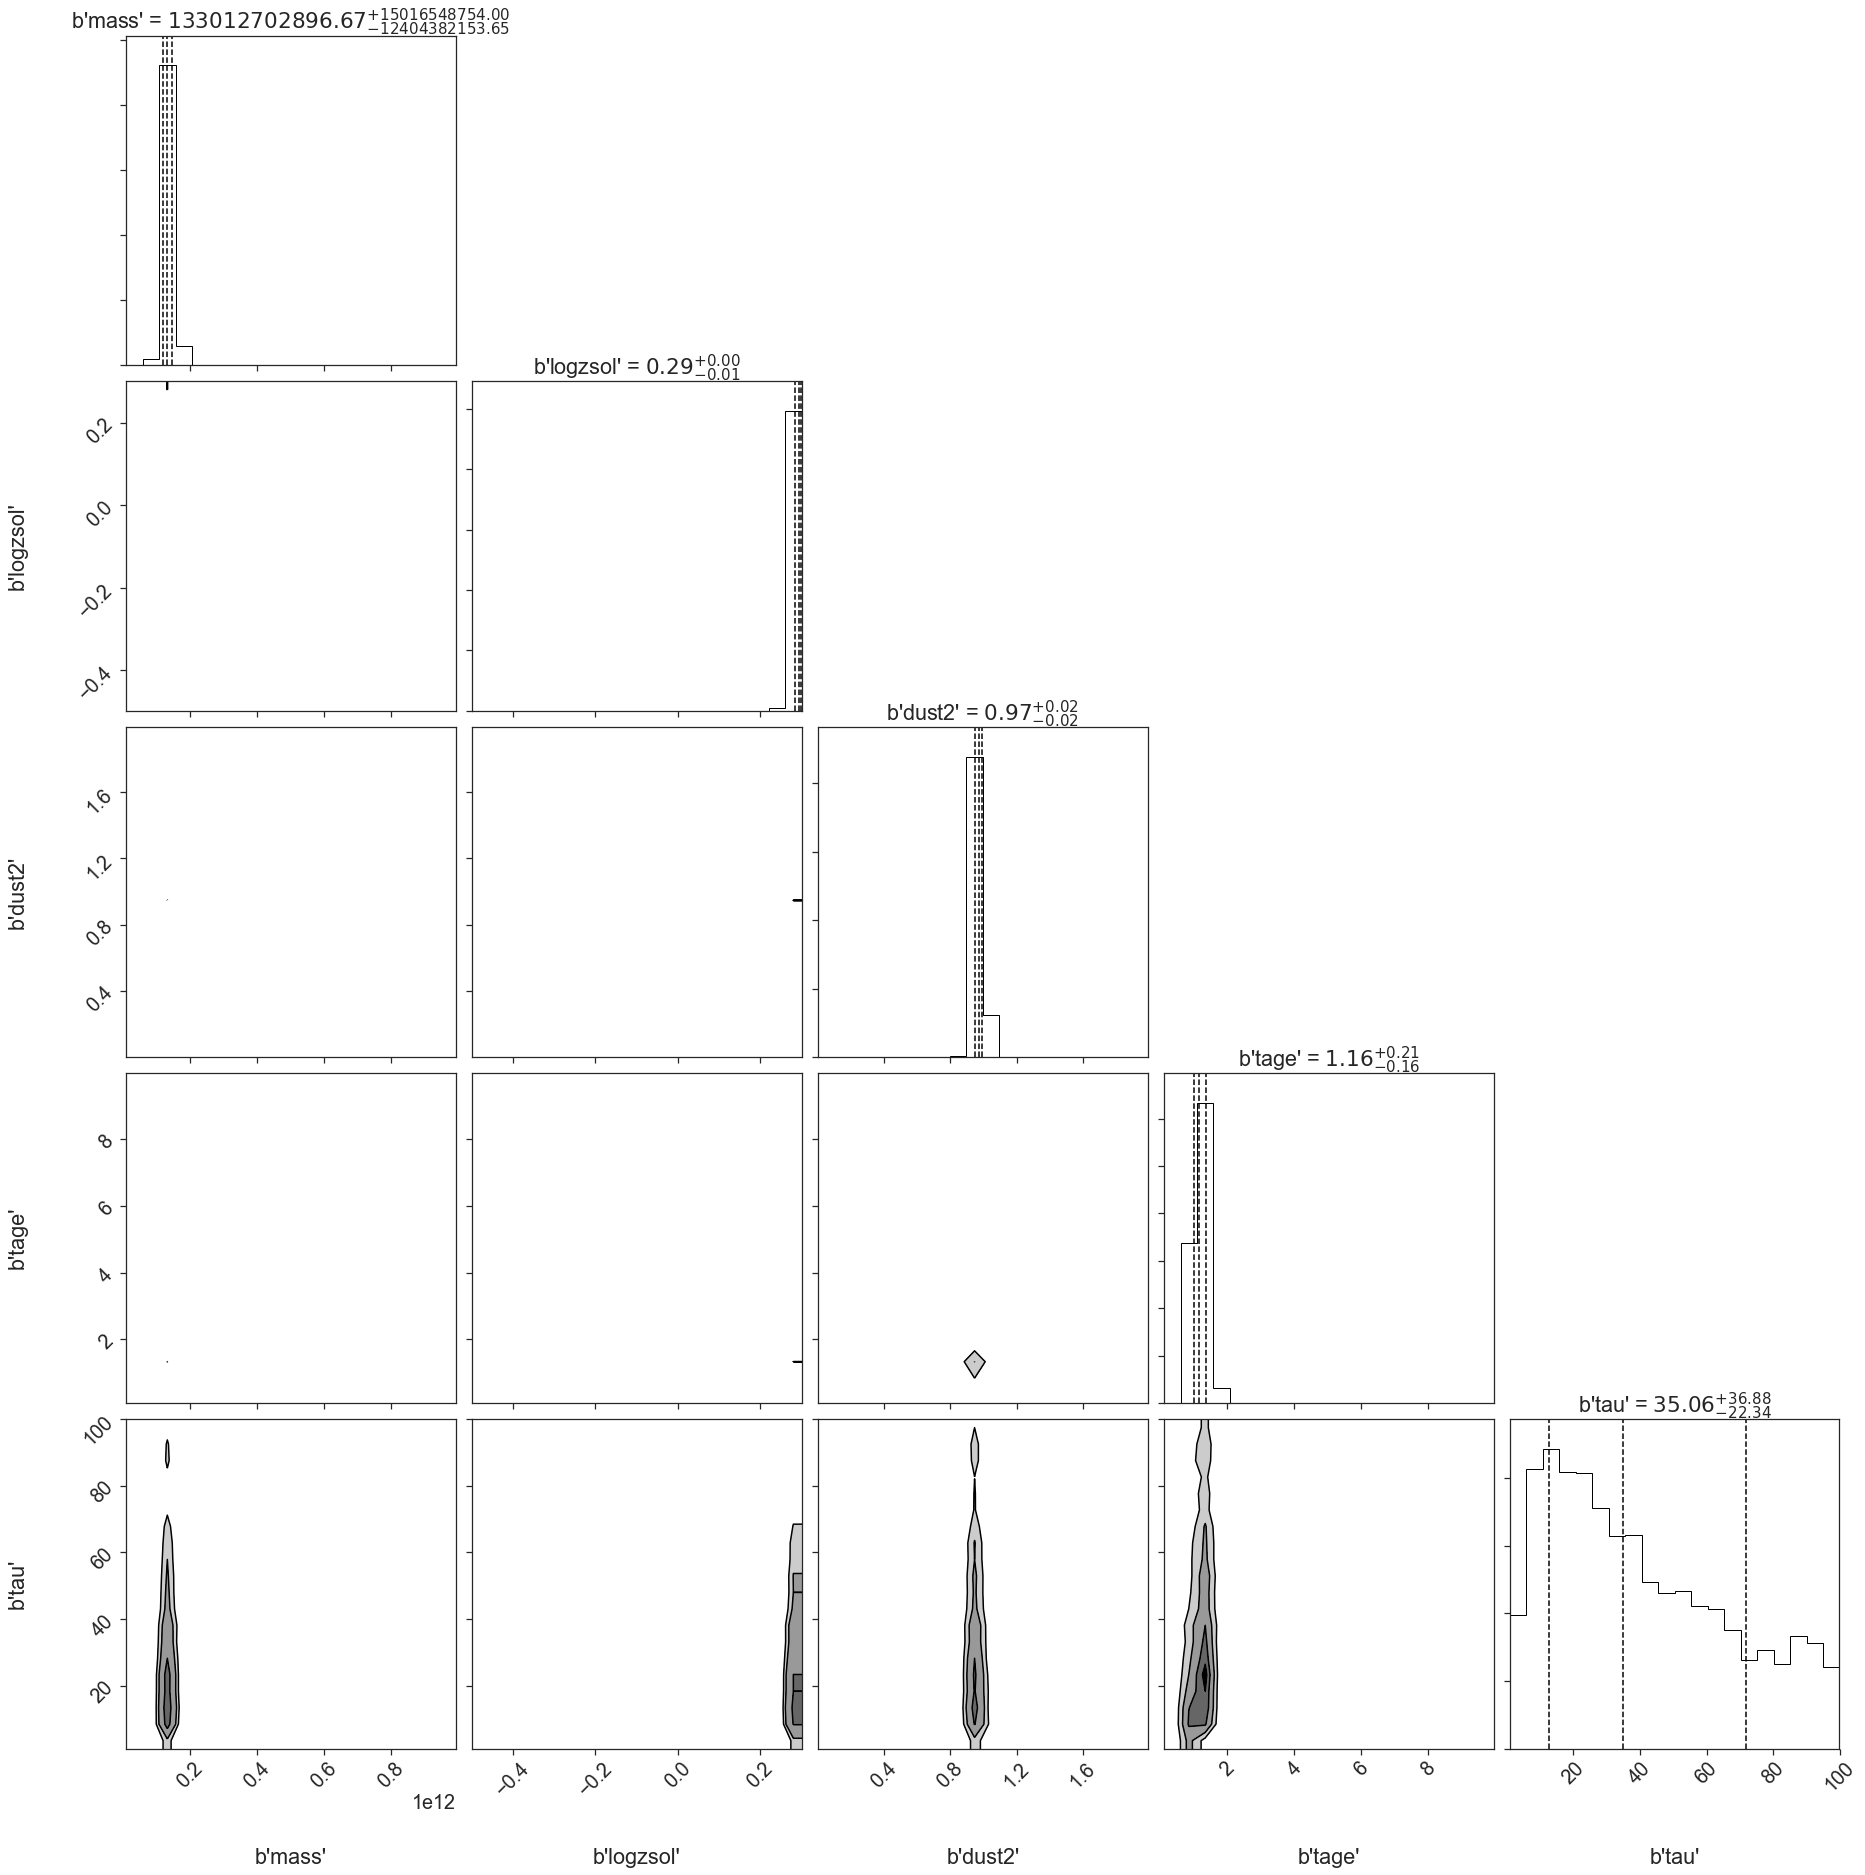

In [23]:
cornerfig = reader.subcorner(result, start=0, thin=1, fig=plt.subplots(5,5,figsize=(27,27))[0])

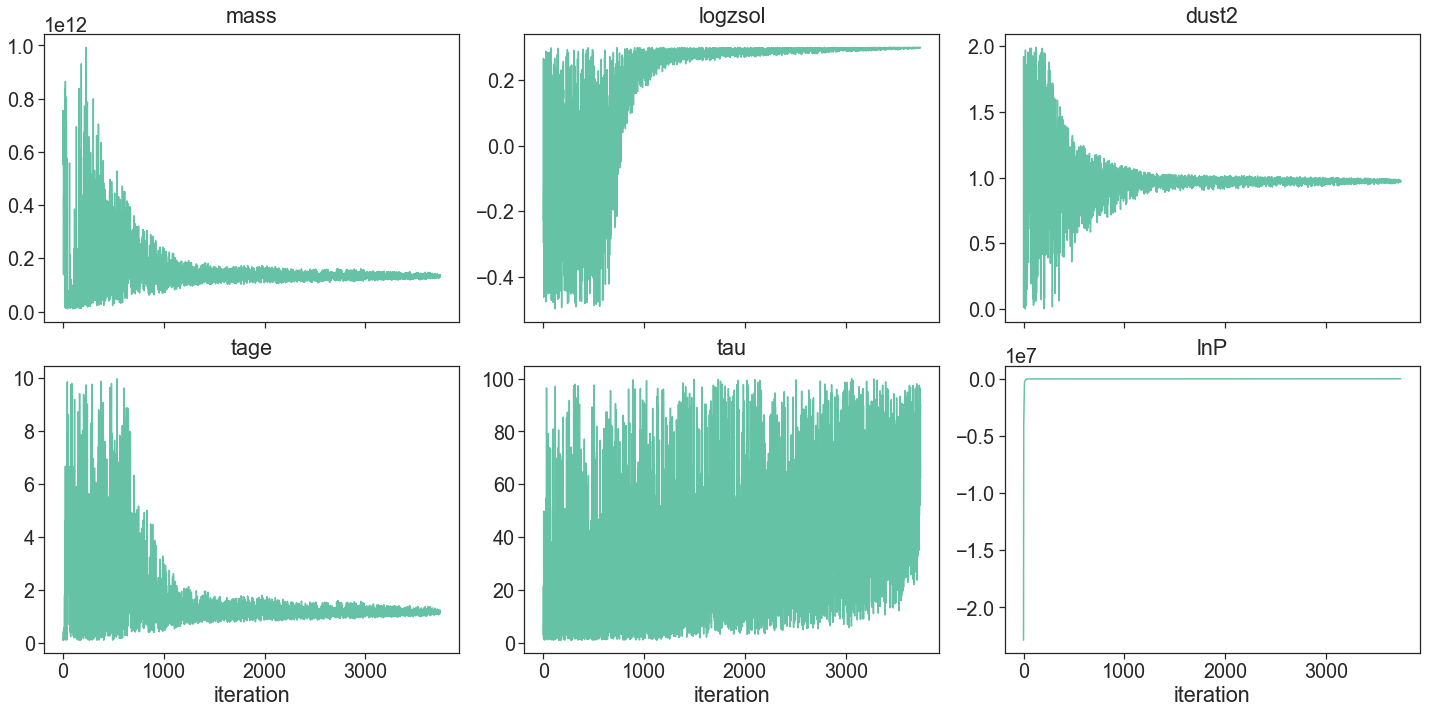

In [24]:
tracefig = reader.traceplot(result, figsize=(20,10))

In [ ]:
stop

In [8]:
TemplateLibrary.describe('burst_sfh')

Free Parameters: (name: prior) 
-----------
  

Fixed Parameters: (name: value [, depends_on]) 
-----------
  tburst: 0.0 <function tburst_from_fage at 0x15a535a60>
  fburst: 0.0 
  fage_burst: 0.0 


In [9]:
TemplateLibrary.describe('parametric_sfh')

Free Parameters: (name: prior) 
-----------
  mass: <class 'prospect.models.priors.LogUniform'>(mini=100000000.0,maxi=1000000000000.0)
  logzsol: <class 'prospect.models.priors.TopHat'>(mini=-2,maxi=0.19)
  dust2: <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0)
  tage: <class 'prospect.models.priors.TopHat'>(mini=0.001,maxi=13.8)
  tau: <class 'prospect.models.priors.LogUniform'>(mini=0.1,maxi=30)

Fixed Parameters: (name: value [, depends_on]) 
-----------
  zred: 0.1 
  sfh: 4 
  imf_type: 2 
  dust_type: 0 


In [10]:
model = load_model('delayed-tau', redshift=obs['redshift'])
model.theta_labels

<bound method ProspectorParams.theta_labels of :::::::
<class 'prospect.models.sedmodel.SedModel'>

Free Parameters: (name: prior) 
-----------
  mass: <class 'prospect.models.priors.LogUniform'>(mini=10000000000.0,maxi=1000000000000.0)
  logzsol: <class 'prospect.models.priors.TopHat'>(mini=-1.0,maxi=0.3)
  dust2: <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0)
  tage: <class 'prospect.models.priors.LogUniform'>(mini=0.001,maxi=10)
  tau: <class 'prospect.models.priors.LogUniform'>(mini=1,maxi=100.0)

Fixed Parameters: (name: value [, depends_on]) 
-----------
  zred: 0.535 
  sfh: 4 
  imf_type: 2 
  dust_type: 0 
  add_dust_emission: True 
  duste_umin: 1.0 
  duste_qpah: 4.0 
  duste_gamma: 0.001 >

In [11]:
%time theta_best = max_likelihood(run_params, model, obs, sps, verbose=True, seed=seed)

/usr/local/anaconda3/envs/hizea/lib/python3.6/site-packages/prospect-0.2-py3.6.egg/prospect/models/priors.py:155: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/envs/hizea/lib/python3.6/site-packages/scipy/optimize/_lsq/dogbox.py:199: RuntimeWarning: invalid value encountered in less
  active_set = on_bound * g < 0


LinAlgError: SVD did not converge in Linear Least Squares

In [12]:
def qa_sed(theta_best, model, obs, sps):
    
    pspec, pphot, pextra = model.mean_model(theta_best, obs, sps=sps)

    wphot = obs['phot_wave']
    wspec = sps.wavelengths * (1.0 + model.params.get('zred'))

    xmin, xmax = np.min(wphot)*0.5, np.max(wphot)/0.5
    temp = np.interp(np.linspace(xmin, xmax, 10000), wspec, pspec)
    ymin, ymax = temp.min()*0.8, temp.max()/0.4    
    
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.loglog(wspec, pspec, label='Model spectrum', lw=0.7, color='navy', alpha=0.7)
    ax.errorbar(wphot, pphot, label='Model photometry', marker='s', markersize=10, 
                alpha=0.8, ls='', lw=3, markerfacecolor='none', markeredgecolor='blue', 
                markeredgewidth=3)
    ax.errorbar(wphot, obs['maggies'], yerr=obs['maggies_unc'], label='Observed photometry', 
                marker='o', markersize=10, alpha=0.8, ls='', lw=3, ecolor='red', 
                markerfacecolor='none', markeredgecolor='red', 
                markeredgewidth=3)

    ax.set_xlabel(r'Observed-frame Wavelength ($\mu$m)')
    ax.set_ylabel('Flux Density [maggies]')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.legend(loc='best', fontsize=20)
    plt.tight_layout()

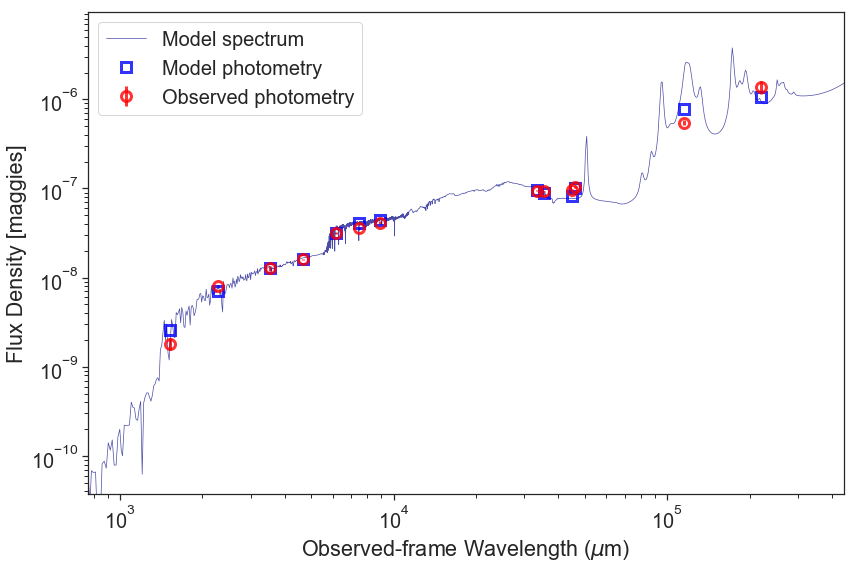

In [13]:
qa_sed(theta_best, model, obs, sps)

In [ ]:
wspec